# QATAR WORLD CUP 2022 ANALYSIS

## Step 0 - Imports and Reading Data

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim


## Step 1 - Data Understanding

In [3]:
df = pd.read_csv('Fifa_world_cup_matches.csv')
df.head()

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20 NOV 2022,17 : 00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 NOV 2022,14 : 00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21 NOV 2022,17 : 00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,21 NOV 2022,20 : 00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 NOV 2022,11 : 00,Group C,...,1,0,4,14,0,0,65,80,163,361


In [4]:
df.shape

(64, 88)

In [5]:
df.columns

Index(['team1', 'team2', 'possession team1', 'possession team2',
       'possession in contest', 'number of goals team1',
       'number of goals team2', 'date', 'hour', 'category',
       'total attempts team1', 'total attempts team2', 'conceded team1',
       'conceded team2', 'goal inside the penalty area team1',
       'goal inside the penalty area team2',
       'goal outside the penalty area team1',
       'goal outside the penalty area team2', 'assists team1', 'assists team2',
       'on target attempts team1', 'on target attempts team2',
       'off target attempts team1', 'off target attempts team2',
       'attempts inside the penalty area team1',
       'attempts inside the penalty area  team2',
       'attempts outside the penalty area  team1',
       'attempts outside the penalty area  team2', 'left channel team1',
       'left channel team2', 'left inside channel team1',
       'left inside channel team2', 'central channel team1',
       'central channel team2', 'right in

In [6]:
df.dtypes

team1                                object
team2                                object
possession team1                     object
possession team2                     object
possession in contest                object
                                      ...  
own goals team2                       int64
forced turnovers team1                int64
forced turnovers team2                int64
defensive pressures applied team1     int64
defensive pressures applied team2     int64
Length: 88, dtype: object

In [7]:
df.describe

<bound method NDFrame.describe of             team1         team2 possession team1 possession team2  \
0           QATAR       ECUADOR              42%              50%   
1         ENGLAND          IRAN              72%              19%   
2         SENEGAL   NETHERLANDS              44%              45%   
3   UNITED STATES         WALES              51%              39%   
4       ARGENTINA  SAUDI ARABIA              64%              24%   
..            ...           ...              ...              ...   
59        ENGLAND        FRANCE              54%              36%   
60      ARGENTINA       CROATIA              34%              54%   
61         FRANCE       MOROCCO              34%              55%   
62        CROATIA       MOROCCO              45%              45%   
63      ARGENTINA        FRANCE              46%              40%   

   possession in contest  number of goals team1  number of goals team2  \
0                     8%                      0                

In [8]:
# Check for any null values
df.isnull().sum()

team1                                0
team2                                0
possession team1                     0
possession team2                     0
possession in contest                0
                                    ..
own goals team2                      0
forced turnovers team1               0
forced turnovers team2               0
defensive pressures applied team1    0
defensive pressures applied team2    0
Length: 88, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 88 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   team1                                                  64 non-null     object
 1   team2                                                  64 non-null     object
 2   possession team1                                       64 non-null     object
 3   possession team2                                       64 non-null     object
 4   possession in contest                                  64 non-null     object
 5   number of goals team1                                  64 non-null     int64 
 6   number of goals team2                                  64 non-null     int64 
 7   date                                                   64 non-null     object
 8   hour                                                   64 non-

In [10]:
# Check for any duplicated values
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
59    False
60    False
61    False
62    False
63    False
Length: 64, dtype: bool

## Step 2 - Data Preparation

Let's identify some of the data points which look interesting

- Possession
- Number of Goals Scored
- Goals Conceded 
- Number of Attempts 
- Yellow Cards/ Red Cards
- Passes & Pass completion

## Step 3 - Feature Understanding

### Goals

In [11]:
team_goals = df.groupby('team1')['number of goals team1'].sum().reset_index()
team_goals.columns = ['Team', 'Goals Scored']


team_goals['Goals Scored'] += df.groupby('team2')['number of goals team2'].sum().reset_index()['number of goals team2']

In [12]:
# Check to see table creation worked
team_goals.head()

,Team,Goals Scored
0,ARGENTINA,15
1,AUSTRALIA,4
2,BELGIUM,1
3,BRAZIL,8
4,CAMEROON,4


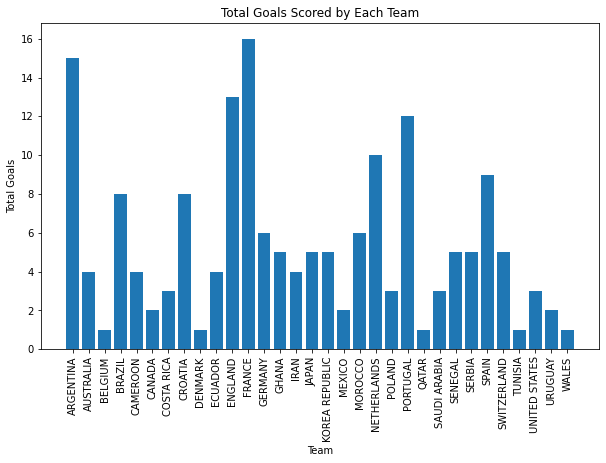

In [13]:
plt.figure(figsize=(10,6))
plt.bar(team_goals['Team'], team_goals['Goals Scored'])
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.title('Total Goals Scored by Each Team')
plt.xticks(rotation=90)
plt.show()

### Games Played

In [14]:
#Find the number of games played by each team
games_played = pd.concat([df['team1'], df['team2']]).value_counts().reset_index()
games_played.columns = ['Team', 'Games Played']

games_played.head()

,Team,Games Played
0,CROATIA,7
1,ARGENTINA,7
2,MOROCCO,7
3,FRANCE,7
4,NETHERLANDS,5


### Goals Conceded

In [15]:
goals_conceded = df.groupby('team1')['conceded team1'].sum().reset_index()
goals_conceded.columns = ['Team', 'Goals Conceded']

goals_conceded['Goals Conceded'] += df.groupby('team2')['conceded team2'].sum().reset_index()['conceded team2']

In [16]:
goals_conceded.head()

,Team,Goals Conceded
0,ARGENTINA,8
1,AUSTRALIA,6
2,BELGIUM,2
3,BRAZIL,3
4,CAMEROON,4


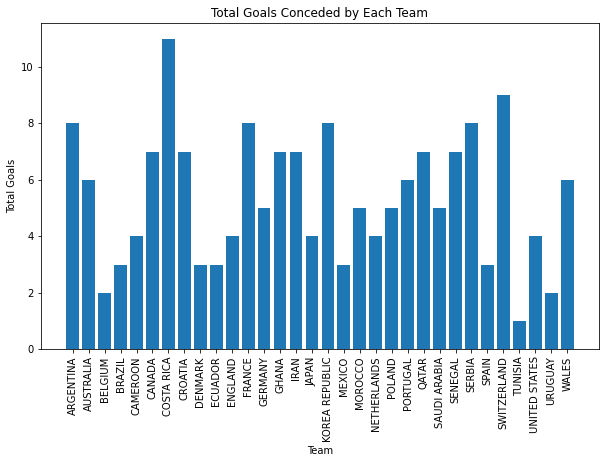

In [17]:
plt.figure(figsize=(10,6))
plt.bar(goals_conceded['Team'], goals_conceded['Goals Conceded'])
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.title('Total Goals Conceded by Each Team')
plt.xticks(rotation=90)
plt.show()

In [18]:
played_scored = pd.merge(games_played, team_goals, on="Team", how='left')
played_scored_conceded = pd.merge(played_scored, goals_conceded, on='Team', how='left')

played_scored_conceded.head()

,Team,Games Played,Goals Scored,Goals Conceded
0,CROATIA,7,8,7
1,ARGENTINA,7,15,8
2,MOROCCO,7,6,5
3,FRANCE,7,16,8
4,NETHERLANDS,5,10,4


In [19]:
# Export to csv for visualisation in Tableau 
played_scored_conceded.to_csv('played_scored_conceded.csv', index=False)

### Possession

In [122]:
# Concatenate 'team1' and 'team2' columns
teams = df['team1'].unique().tolist() + df['team2'].unique().tolist()

# Calculate the average possession for each team
average_possession = []
for team in teams:
    team1_avg = df[df['team1'] == team]['possession team1'].mean()
    team2_avg = df[df['team2'] == team]['possession team2'].mean()
    avg = (team1_avg + team2_avg) / 2
    average_possession.append(avg)

# Create a new dataframe with team and average possession columns
average_possession_df = pd.DataFrame({
    'Team': teams,
    'Average Possession': average_possession
})

# Display the table of average possession for each team
average_possession_df.head()


,Team,Average Possession
0,QATAR,40.000000
1,ENGLAND,57.875000
2,SENEGAL,41.166667
3,UNITED STATES,48.666667
4,ARGENTINA,52.450000


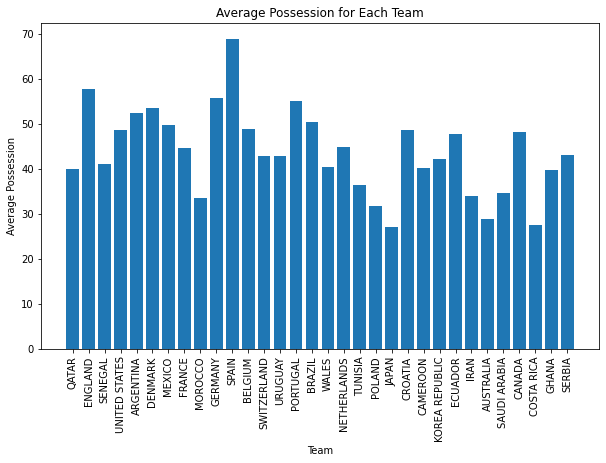

In [123]:
plt.figure(figsize=(10,6))
plt.bar(average_possession_df['Team'], average_possession_df['Average Possession'])
plt.xlabel('Team')
plt.ylabel('Average Possession')
plt.title('Average Possession for Each Team')
plt.xticks(rotation=90)
plt.show()

### ATTEMPTS

In [31]:

attempts_on_target = df.groupby('team1')['on target attempts team1'].sum().reset_index()
attempts_on_target.columns = ['Team', 'Attempts on Target']

attempts_on_target['Attempts on Target'] += df.groupby('team2')['on target attempts team2'].sum().reset_index()['on target attempts team2']


total_attempts = df.groupby('team1')['total attempts team1'].sum().reset_index()
total_attempts.columns = ['Team', 'Total Attempts']

total_attempts['Total Attempts'] += df.groupby('team2')['total attempts team2'].sum().reset_index()['total attempts team2']



attempts_df = pd.merge(attempts_on_target, total_attempts, on='Team', how='left')


attempts_df.head(10)

,Team,Attempts on Target,Total Attempts
0,ARGENTINA,48,104
1,AUSTRALIA,9,25
2,BELGIUM,11,34
3,BRAZIL,41,90
4,CAMEROON,14,27
5,CANADA,6,35
6,COSTA RICA,7,12
7,CROATIA,28,81
8,DENMARK,9,35
9,ECUADOR,12,27


### CARDS

In [23]:
yellow_cards = df.groupby('team1')['yellow cards team1'].sum().reset_index()
yellow_cards.columns = ['Team', 'Yellow Cards']

yellow_cards['Yellow Cards'] += df.groupby('team2')['yellow cards team2'].sum().reset_index()['yellow cards team2']

In [24]:
yellow_cards.head()

,Team,Yellow Cards
0,ARGENTINA,16
1,AUSTRALIA,7
2,BELGIUM,5
3,BRAZIL,6
4,CAMEROON,8


In [25]:
red_cards = df.groupby('team1')['red cards team1'].sum().reset_index()
red_cards.columns = ['Team', 'Red Cards']

red_cards['Red Cards'] += df.groupby('team2')['red cards team2'].sum().reset_index()['red cards team2']

In [26]:
red_cards.head()

,Team,Red Cards
0,ARGENTINA,0
1,AUSTRALIA,0
2,BELGIUM,0
3,BRAZIL,0
4,CAMEROON,1


In [27]:
total_cards = pd.merge(yellow_cards, red_cards, on='Team', how='left')
total_cards.head()

,Team,Yellow Cards,Red Cards
0,ARGENTINA,16,0
1,AUSTRALIA,7,0
2,BELGIUM,5,0
3,BRAZIL,6,0
4,CAMEROON,8,1


In [28]:
total_cards.to_csv('total_cards.csv', index='False')

### Group and Furthest Stage

In [46]:
# Create a dictionary to store the furthest stage for each team
furthest_stage = {}

# Define the order of stages
stage_order = ['Group A', 'Group B', 'Group C', 'Group D', 'Group E', 'Group F', 'Group G', 'Group H',
               'Round of 16', 'Quarter-final', 'Semi-final', 'Play-off for third place', 'Final']

# Iterate over each row in the data
for _, row in df.iterrows():
    # Get the team names and category for the current row
    team1 = row['team1']
    team2 = row['team2']
    category = row['category']

    # Determine the progression for the teams in the current row
    if category != 'Final':
        progression = category
    else:
        progression = stage_order[-1]  # If it is the final, set the progression as 'Final'
    
    # Update furthest stage for team1
    if team1 not in furthest_stage or stage_order.index(progression) > stage_order.index(furthest_stage[team1]):
        furthest_stage[team1] = progression
    
    # Update furthest stage for team2
    if team2 not in furthest_stage or stage_order.index(progression) > stage_order.index(furthest_stage[team2]):
        furthest_stage[team2] = progression

# Create a new DataFrame to store the results
groups_furthest_stages = pd.DataFrame(columns=['Team', 'Group', 'Furthest Stage'])

# Populate the groups_furthest_stages DataFrame with the team, category, and furthest stage information
for team, stage in furthest_stage.items():
    team_data = df[(df['team1'] == team) | (df['team2'] == team)]
    category = team_data['category'].iloc[0]  

    # Rename furthest stage to 'Group Stages'
    if stage.startswith('Group'):
        stage = 'Group Stages'  
    groups_furthest_stages = groups_furthest_stages.append({'Team': team, 'Group': category, 'Furthest Stage': stage}, ignore_index=True)


print(groups_furthest_stages)

              Team    Group            Furthest Stage
0            QATAR  Group A              Group Stages
1          ECUADOR  Group A              Group Stages
2          ENGLAND  Group B             Quarter-final
3             IRAN  Group B              Group Stages
4          SENEGAL  Group A               Round of 16
5      NETHERLANDS  Group A             Quarter-final
6    UNITED STATES  Group B               Round of 16
7            WALES  Group B              Group Stages
8        ARGENTINA  Group C                     Final
9     SAUDI ARABIA  Group C              Group Stages
10         DENMARK  Group D              Group Stages
11         TUNISIA  Group D              Group Stages
12          MEXICO  Group C              Group Stages
13          POLAND  Group C               Round of 16
14          FRANCE  Group D                     Final
15       AUSTRALIA  Group D               Round of 16
16         MOROCCO  Group F  Play-off for third place
17         CROATIA  Group F 

In [48]:
groups_furthest_stages.to_csv('groups_furthest_stages.csv', index=False)

### Game Results

In [95]:
# Create a list to store the final scores
final_scores = []

# Iterate over each row in the data
for _, row in df.iterrows():
    team1 = row['team1']
    team2 = row['team2']
    goals_team1 = row['number of goals team1']
    goals_team2 = row['number of goals team2']
    category = row['category']

    # Determine the final score based on the goals
    if pd.isnull(goals_team1) or pd.isnull(goals_team2):
        final_score = 'N/A'
    elif goals_team1 > goals_team2:
        final_score = str(goals_team1) + '-' + str(goals_team2)
        winning_team = team1
        losing_team = team2
    elif goals_team2 > goals_team1:
        final_score = str(goals_team2) + '-' + str(goals_team1)
        winning_team = team2
        losing_team = team1
    else:
        final_score = str(goals_team1) + '-' + str(goals_team2)
        # If it's a draw, include both teams as opponents
        final_scores.append({'team': team1, 'opponent': team2, 'final_score': final_score, 'category': category})
        final_scores.append({'team': team2, 'opponent': team1, 'final_score': final_score, 'category': category})
        continue

    # Append the game details to the final_scores list
    final_scores.append({'team': winning_team, 'opponent': losing_team, 'final_score': final_score, 'category': category})
    final_scores.append({'team': losing_team, 'opponent': winning_team, 'final_score': final_score[::-1], 'category': category})

# Create a DataFrame from the list of final scores
final_scores_df = pd.DataFrame(final_scores)

# Print the final scores DataFrame
print(final_scores_df)


            team   opponent final_score                  category
0        ECUADOR      QATAR         2-0                   Group A
1          QATAR    ECUADOR         0-2                   Group A
2        ENGLAND       IRAN         6-2                   Group B
3           IRAN    ENGLAND         2-6                   Group B
4    NETHERLANDS    SENEGAL         2-0                   Group A
..           ...        ...         ...                       ...
123      MOROCCO     FRANCE         0-2                Semi-final
124      CROATIA    MOROCCO         2-1  Play-off for third place
125      MOROCCO    CROATIA         1-2  Play-off for third place
126    ARGENTINA     FRANCE         3-3                     Final
127       FRANCE  ARGENTINA         3-3                     Final

[128 rows x 4 columns]


In [96]:
final_scores_df.to_csv('final_scores.csv', index=False)

### LOCATION

In [108]:
# Create a new DataFrame for the location table
location_df = pd.DataFrame({'team1': df['team1'].unique()})


# Create a geocoder instance
geolocator = Nominatim(user_agent="my_geocoder")

# Create a list to store the location data
location_data = []

# Function to get the location for each country
def get_location(country):
    location = geolocator.geocode(country)
    if location:
        return location.latitude, location.longitude
    else:
        return None

# Get unique team names
unique_teams = df['team1'].unique()

# Retrieve location data for each team
for team in unique_teams:
    location = get_location(team)
    if location is not None:
        latitude, longitude = location
        location_data.append({'team': team, 'latitude': latitude, 'longitude': longitude})

# Create a DataFrame from the location data
location_df = pd.DataFrame(location_data)

# Print the resulting DataFrame
print(location_df)

              team   latitude   longitude
0            QATAR  25.333698   51.229529
1          ENGLAND  52.531021   -1.264906
2          SENEGAL  14.475061  -14.452961
3    UNITED STATES  39.783730 -100.445882
4        ARGENTINA -34.996496  -64.967282
5          DENMARK  55.670249   10.333328
6           MEXICO  23.658512 -102.007710
7           FRANCE  46.603354    1.888334
8          MOROCCO  31.172821   -7.336248
9          GERMANY  51.163818   10.447831
10           SPAIN  39.326068   -4.837979
11         BELGIUM  50.640281    4.666715
12     SWITZERLAND  46.798562    8.231974
13         URUGUAY -32.875555  -56.020153
14        PORTUGAL  39.662165   -8.135352
15          BRAZIL -10.333333  -53.200000
16           WALES  52.292812   -3.738930
17     NETHERLANDS  52.243498    5.634323
18         TUNISIA  33.843941    9.400138
19          POLAND  52.215933   19.134422
20           JAPAN  36.574844  139.239418
21         CROATIA  45.365844   15.657521
22        CAMEROON   4.612552   13

In [109]:
location_df.to_csv('locations.csv', index=False)